# 실습1

 성적 데이터의 유사도 행렬 : **코사인 유사도(Cosine Similarity)** 를 활용합니다.

- 학생 성적 데이터를  NumPy배열로 만든다.
- 학생간 성적 패턴 유사도를 계산한다.
- Seaborn의 heatmap()으로 시각화
- 
### 1. 데이터

```python
    학생별 성적: 자바, 오라클, 스프링
    [85, 90, 88],   # 철수
    [78, 85, 82],   # 영희
    [92, 88, 95],   # 민수
    [70, 75, 80]    # 지영
    

```
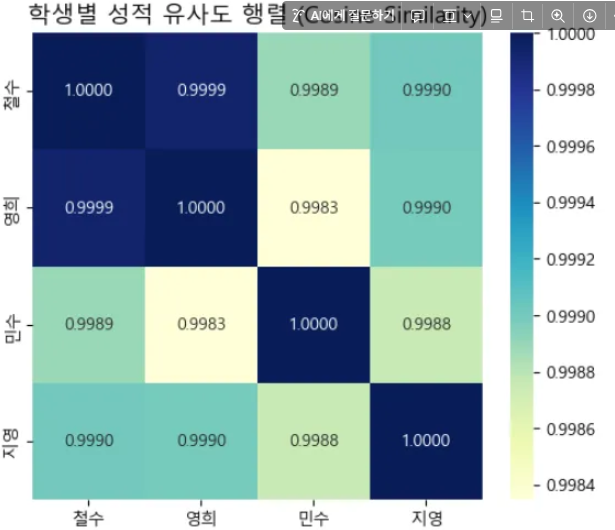


### 코사인 유사도 (Cosine Similarity)

👉 두 벡터의 **각도**를 이용한 유사도

$cos(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}$

= $\frac{\sum_i A_i B_i}{\sqrt{\sum_i A_i^2} \, \sqrt{\sum_i B_i^2}}$

- 분자 : 두 벡터의 내적(dot product)

- 분모 : 벡터 크기의 

- 내적(dot product)으로 계산
- 값의 범위: -1 ~ 1
    - 1 → 방향이 완전히 같음 (매우 유사)
    - 0 → 서로 직각 (관련 없음)
    - 1 → 정반대 방향

→ 문서 분석, 추천 시스템에서 가장 많이 사용


In [11]:
#데이터 준비
import numpy as np
#학생별 성적: 자바, 오라클, 스프링
scores=np.array([
                [85, 90, 88],   # 철수
                [78, 85, 82],   # 영희
                [92, 88, 95],   # 민수
                [70, 75, 80]    # 지영
              ])    
names = ['철수','영희','민수','지영']
print(f'scores:\n{scores}')

scores:
[[85 90 88]
 [78 85 82]
 [92 88 95]
 [70 75 80]]


### 2. 코사인 유사도 함수 정의

In [14]:
def cosine_similarity(a,b):
    return np.dot(a,b) / (np.linalg.norm(a) * np.linalg.norm(b))

### 3. 유사도 행렬 계산

In [15]:
n = len(scores) # 4
sim_matrix=np.zeros((n,n))

print(f'sim_matrix:\n{sim_matrix}')

for i in range(n):
    for j in range(n):
        sim_matrix[i,j] = cosine_similarity(scores[i],scores[j])

print(f'sim_matrix:\n{sim_matrix}')        


sim_matrix:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
sim_matrix:
[[1.         0.99993155 0.99889126 0.99900676]
 [0.99993155 1.         0.998347   0.99899303]
 [0.99889126 0.998347   1.         0.99875947]
 [0.99900676 0.99899303 0.99875947 1.        ]]


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


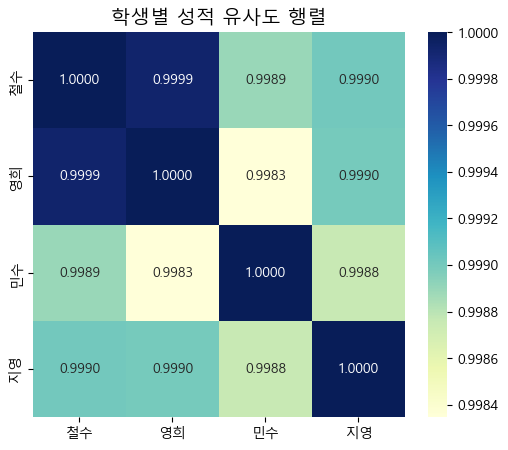

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기본 한글 글꼴
plt.rcParams['axes.unicode_minus'] =False # 마이너스 기고 깨짐 방지

plt.figure(figsize=(6,5))
sns.heatmap(sim_matrix,annot=True, xticklabels=names, yticklabels=names,cmap='YlGnBu', fmt=".4f")
plt.title('학생별 성적 유사도 행렬', fontsize=14)
plt.show()

